In [1]:
import numpy
import pandas
from pandas import concat

#Import sampling helper
from sklearn.model_selection import train_test_split
#Import preprocessing modules
from sklearn import preprocessing
#Import random forest model
from sklearn.ensemble import RandomForestRegressor
#Import logist regression model
from sklearn.linear_model import LogisticRegression

#Import cross-validation pipelinePython
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import GridSearchCV

#Import evaluation metricsPython
from sklearn.metrics import mean_squared_error, r2_score

#Import module for saving scikit-learn modelsPython
import joblib

import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics

In [ ]:
xbruStocks = pandas.read_csv('https://raw.githubusercontent.com/pierreyb/FindTurbo/master/Euronext_XBRU_Equities.csv',
                             sep=';',
                             dayfirst=True,
                             quotechar='"')

In [ ]:
ABInbevStocks = pandas.read_csv('https://raw.githubusercontent.com/pierreyb/FindTurbo/master/AB%20INBEV_historical_price.csv',
                             sep=';',
                             dayfirst=True,
                             parse_dates=[0],
                             thousands=',',
                             quotechar='"',
                             index_col=[0],
                             header=3)

In [2]:
ABInbevQuandl = pandas.read_csv('https://www.quandl.com/api/v3/datasets/EURONEXT/ABI.csv?api_key=_czXMKeX32eTXGttzD8H',
                                parse_dates=[0],
                                index_col=[0])

In [32]:
ABInbevQuandl.sort_index(inplace=True)
ABInbevQuandl['price'] = (ABInbevQuandl.High+ABInbevQuandl.Low)/2
ABInbevQuandl['perc5d'] = (ABInbevQuandl['Low'].shift(-5)-ABInbevQuandl['High'])/ABInbevQuandl['High']
ABInbevQuandl['Target5d'] = (ABInbevQuandl['perc5d'] >= 0.05 ) * 1

for i in range(2,60,):
    ABInbevQuandl['PercHigh%dd' % i] = (1 - ABInbevQuandl.High.rolling(i).max() / ABInbevQuandl.price)
    ABInbevQuandl['PercLow%dd' % i] = (1 - ABInbevQuandl.Low.rolling(i).min() / ABInbevQuandl.price)

ABInbevQuandl.dropna(inplace=True)



In [33]:
ABInbevQuandl.sort_index(ascending=False).head(20)

,Open,High,Low,Last,Volume,Turnover,price,perc5d,Target5d,PercHigh2d,...,PercHigh55d,PercLow55d,PercHigh56d,PercLow56d,PercHigh57d,PercLow57d,PercHigh58d,PercLow58d,PercHigh59d,PercLow59d
Date,,,,,,,,,,,,,,,,,,,,,
2019-10-01,87.78,88.91,85.44,85.44,1822668.0,157371023.0,87.175,-0.058036,0,-0.019902,...,-0.063493,0.101807,-0.063493,0.120275,-0.063493,0.120275,-0.063493,0.120275,-0.063493,0.120275
2019-09-30,86.73,87.72,86.31,87.42,1607059.0,140053897.0,87.015,-0.039102,0,-0.008102,...,-0.065448,0.118658,-0.065448,0.118658,-0.065448,0.118658,-0.065448,0.118658,-0.065448,0.118658
2019-09-27,87.11,87.72,86.66,87.04,1024089.0,89115020.0,87.190,-0.057228,0,-0.006079,...,-0.063310,0.120427,-0.063310,0.120427,-0.063310,0.120427,-0.063310,0.120427,-0.063310,0.120427
2019-09-26,85.35,87.06,85.35,86.82,837450.0,72394996.0,86.205,-0.060188,0,-0.009918,...,-0.075460,0.110376,-0.075460,0.110376,-0.075460,0.110376,-0.075460,0.110376,-0.075460,0.110376
2019-09-25,84.72,86.75,84.56,86.22,1355375.0,116456427.0,85.655,-0.041960,0,-0.020839,...,-0.082365,0.104664,-0.082365,0.104664,-0.082365,0.104664,-0.082365,0.104664,-0.082365,0.107233
2019-09-24,87.04,87.44,85.34,85.34,1474518.0,126505161.0,86.390,-0.022873,0,-0.016784,...,-0.073157,0.112282,-0.073157,0.112282,-0.073157,0.112282,-0.073157,0.114828,-0.073157,0.119921
2019-09-23,87.18,87.84,87.04,87.47,1377025.0,120168385.0,87.440,-0.017418,0,-0.007205,...,-0.060270,0.122941,-0.060270,0.122941,-0.060270,0.125457,-0.060270,0.130489,-0.060270,0.130489
2019-09-20,86.62,88.07,85.64,88.07,4625677.0,404121311.0,86.855,-0.016010,0,-0.013989,...,-0.067411,0.117034,-0.067411,0.119567,-0.067411,0.124633,-0.067411,0.124633,-0.067411,0.124633
2019-09-19,87.17,87.24,86.00,86.40,1303517.0,112582989.0,86.620,-0.021664,0,-0.017086,...,-0.070307,0.117178,-0.070307,0.122258,-0.070307,0.122258,-0.070307,0.122258,-0.070307,0.122258


In [65]:
y = ABInbevQuandl.Target5d
X = ABInbevQuandl.drop('Target5d', axis=1)

#Split data into train and test setsPython
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.8, 
                                                    random_state=123, 
                                                    stratify=y)

logisticRegr = LogisticRegression()
logisticRegr.fit(X_train, y_train)

predictions = logisticRegr.predict(X_test)

score = logisticRegr.score(X_test, y_test)

cm = metrics.confusion_matrix(y_test, predictions)


C:\Users\pierr\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


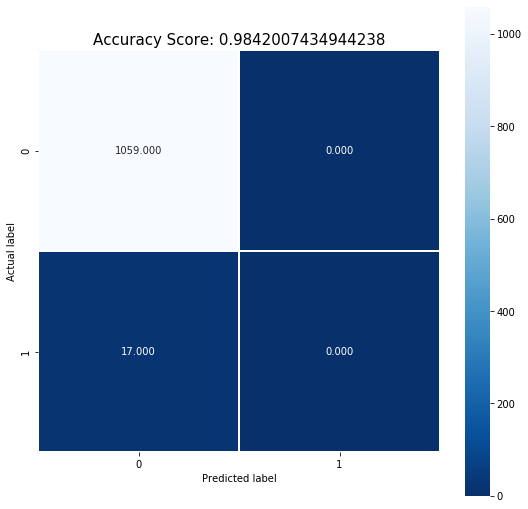

In [66]:
    
plt.figure(figsize=(9,9))
sns.heatmap(cm, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Accuracy Score: {0}'.format(score)
plt.title(all_sample_title, size = 15);
